In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,precision_score, f1_score,classification_report
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRFClassifier


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('Breast_Cancer.csv')
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


### Explore Data

In [7]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [8]:
data.sample(7)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1830,40,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,14,Positive,Positive,1,1,55,Alive
2748,42,White,Single,T3,N1,IIIA,Moderately differentiated,2,Regional,80,Positive,Positive,13,2,90,Alive
214,54,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,10,9,56,Alive
1027,62,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,6,Positive,Positive,4,1,91,Alive
3822,55,Other,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,30,Positive,Negative,26,26,79,Alive
2471,54,White,Single,T3,N2,IIIA,Moderately differentiated,2,Regional,51,Positive,Positive,6,5,104,Alive
2810,49,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,25,Positive,Positive,10,5,65,Alive


In [10]:
data.shape

(4024, 16)

In [11]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [13]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


## Analysis

<Axes: xlabel='Status', ylabel='count'>

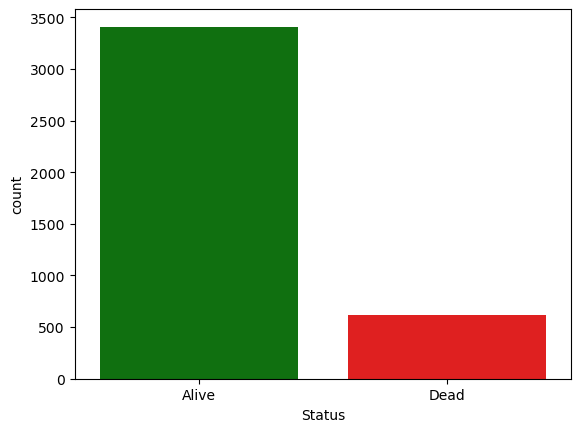

In [14]:
sns.countplot(x='Status',data=data,palette=(['g','r']))

In [15]:
data.Status.value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

## Transform Data

In [16]:
la=LabelEncoder()

In [17]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')



In [19]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])

In [27]:
obj=obj.astype("int")

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Race                    4024 non-null   int32
 1   Marital Status          4024 non-null   int32
 2   T Stage                 4024 non-null   int32
 3   N Stage                 4024 non-null   int32
 4   6th Stage               4024 non-null   int32
 5   differentiate           4024 non-null   int32
 6   Grade                   4024 non-null   int32
 7   A Stage                 4024 non-null   int32
 8   Estrogen Status         4024 non-null   int32
 9   Progesterone Status     4024 non-null   int32
 10  Status                  4024 non-null   int32
 11  Age                     4024 non-null   int64
 12  Tumor Size              4024 non-null   int64
 13  Regional Node Examined  4024 non-null   int64
 14  Reginol Node Positive   4024 non-null   int64
 15  Survival Months      

In [26]:
data=pd.concat([obj,non_obj],axis=1)
data

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0,62,9,1,1,49
4020,2,0,1,1,2,0,2,1,1,1,0,56,46,14,8,69
4021,2,1,1,0,1,0,2,1,1,0,0,68,22,11,3,69
4022,0,0,1,0,1,0,2,1,1,1,0,58,44,11,1,72


## Create Model

In [28]:
x=data.drop(['Status'],axis=1)
y=data['Status']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [32]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=GradientBoostingRegressor()
model4=SVC()
model5=XGBRFClassifier()



In [33]:
model1.fit(x_train,y_train)

LogisticRegression()

In [36]:
pre=model1.predict(x_test)
pre

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
#print(classification_report(y_test,pre))


In [39]:
def pred(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(y_test,pre))
    

In [40]:
pred(model1)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       690
           1       0.76      0.56      0.64       115

    accuracy                           0.91       805
   macro avg       0.85      0.76      0.80       805
weighted avg       0.91      0.91      0.91       805



In [45]:
pred(model2)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       690
           1       0.76      0.57      0.65       115

    accuracy                           0.91       805
   macro avg       0.85      0.77      0.80       805
weighted avg       0.91      0.91      0.91       805



In [47]:
from sklearn.metrics import classification_report

def pred(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    
    # تأكد من أن التنبؤات ثنائية
    if pre.dtype != int:
        pre = (pre > 0.5).astype(int)
    
    print(classification_report(y_test, pre))

# تأكد من تعريف x_train, x_test, y_train, y_test مسبقًا
pred(model3, x_train, y_train, x_test, y_test)




              precision    recall  f1-score   support

           0       0.93      0.97      0.95       690
           1       0.76      0.57      0.65       115

    accuracy                           0.91       805
   macro avg       0.85      0.77      0.80       805
weighted avg       0.91      0.91      0.91       805



In [43]:
pred(model4)


              precision    recall  f1-score   support

           0       0.91      0.98      0.95       690
           1       0.78      0.44      0.57       115

    accuracy                           0.90       805
   macro avg       0.85      0.71      0.76       805
weighted avg       0.90      0.90      0.89       805



In [42]:
pred(model5)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       690
           1       0.75      0.57      0.65       115

    accuracy                           0.91       805
   macro avg       0.84      0.77      0.80       805
weighted avg       0.91      0.91      0.91       805



### الحمد الله هذا من فضل ربي 